### Import necessary packages

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
print('All packages imported!')

All packages imported!


In [41]:
df = pd.read_csv('top_women_chess_players_aug_2020.csv')
df.head()

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
0,700070,"Polgar, Judit",HUN,F,1976.0,GM,2675,2646.0,2736.0,wi
1,8602980,"Hou, Yifan",CHN,F,1994.0,GM,2658,2621.0,2601.0,NaN
2,5008123,"Koneru, Humpy",IND,F,1987.0,GM,2586,2483.0,2483.0,NaN
3,4147103,"Goryachkina, Aleksandra",RUS,F,1998.0,GM,2582,2502.0,2441.0,NaN
4,700088,"Polgar, Susan",HUN,F,1969.0,GM,2577,NaN,NaN,wi


In [42]:
df.describe()

,Fide id,Year_of_birth,Standard_Rating,Rapid_rating,Blitz_rating
count,8.553000e+03,8261.000000,8553.000000,3608.000000,3472.000000
mean,8.829011e+06,1985.291732,2005.102303,1931.680155,1925.155242
std,9.226777e+06,14.055386,137.146646,191.449272,188.556849
min,1.001450e+05,1920.000000,1801.000000,1224.000000,1159.000000
25%,2.119447e+06,1978.000000,1891.000000,1811.000000,1805.000000
50%,4.500539e+06,1988.000000,1998.000000,1921.000000,1919.000000
75%,1.360553e+07,1995.000000,2090.000000,2051.000000,2044.000000
max,7.360114e+07,2010.000000,2675.000000,2646.000000,2736.000000


In [43]:
nulls = df.isnull().sum()/len(df)*100
nulls.sort_values(ascending = False).head(10)

Title              63.544955
Blitz_rating       59.406056
Rapid_rating       57.815971
Inactive_flag      31.579563
Year_of_birth       3.414007
Standard_Rating     0.000000
Gender              0.000000
Federation          0.000000
Name                0.000000
Fide id             0.000000
dtype: float64

In [44]:
df['Inactive_flag'].value_counts(dropna=False)

wi     5852
NaN    2701
Name: Inactive_flag, dtype: int64

In [45]:
df['Inactive_flag'] = df['Inactive_flag'].fillna('Active')
df['Inactive_flag'] = df['Inactive_flag'].replace('wi', 'Inactive')
df['Inactive_flag'].value_counts(dropna=False)

Inactive    5852
Active      2701
Name: Inactive_flag, dtype: int64

In [46]:
df['Title'].value_counts(dropna=False)

NaN    5435
WFM    1545
WIM     809
WGM     316
WCM     247
IM      119
GM       37
FM       36
CM        8
WH        1
Name: Title, dtype: int64

In [53]:
df[df['Title'].isnull()].head(20)

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
185,8602140,"Wang, Xuan",CHN,F,1986.0,NaN,2326,NaN,NaN,Inactive
216,4106121,"Idelchik, Liubov M",RUS,F,NaN,NaN,2315,NaN,NaN,Inactive
229,8601747,"Liu, Bairu",CHN,F,1982.0,NaN,2310,NaN,NaN,Inactive
312,4107268,"Sammula, Martinovna",RUS,F,NaN,NaN,2280,NaN,NaN,Inactive
331,14102692,"Borzenkova, Irina",UKR,F,1976.0,NaN,2275,NaN,NaN,Inactive
371,11600438,"Klovane, Astra",LAT,F,1944.0,NaN,2265,NaN,NaN,Inactive
383,4162919,"Grigoryeva, Natalya",RUS,F,1982.0,NaN,2262,NaN,NaN,Inactive
387,54117739,"Nur-Mukhametova, Alisa",RUS,F,2005.0,NaN,2262,2031.0,1819.0,Active
393,8602816,"Zeng, Bei",CHN,F,NaN,NaN,2261,NaN,NaN,Inactive
394,4141237,"Ibragimova, Lilia",RUS,F,1966.0,NaN,2260,2222.0,2204.0,Inactive


In [60]:
def overwrite (num, fill):
    part = copy['Standard_Rating'] > num
    copy.loc[part, 'Title'] = copy.loc[part, 'Title'].fillna(fill)

copy = df
overwrite(2499, 'GM')
overwrite(2399, 'IM')
overwrite(2299, 'WGM')
overwrite(2199, 'WIM')
overwrite(2299, 'FM')
overwrite(2099, 'WFM')
overwrite(2199, 'CM')
overwrite(1999, 'WCM')
overwrite(0, 'WH')
copy['Title'].value_counts(dropna=False)
#copy['Title'] = copy[copy['Standard_Rating'] > 2499]['Title'].fillna('GM')
#copy['Title'].value_counts(dropna=False)


WH     3570
WFM    1904
WCM    1689
WIM     871
WGM     319
IM      119
GM       37
FM       36
CM        8
Name: Title, dtype: int64

In [61]:
count = df['Federation'].value_counts()
count

RUS    1698
GER     621
POL     384
UKR     287
IND     284
       ... 
MAD       1
NAM       1
UGA       1
BER       1
MAC       1
Name: Federation, Length: 124, dtype: int64

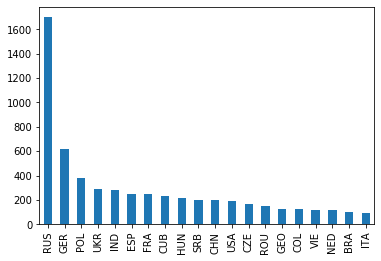

In [62]:
count20 = count.head(20)
count20.plot(kind="bar")

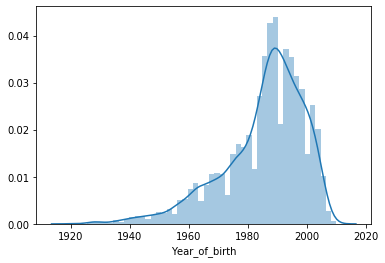

In [63]:
sns.distplot(df['Year_of_birth'])

In [64]:
df['Age'] = 2020 - df['Year_of_birth']
df.head()

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag,Age
0,700070,"Polgar, Judit",HUN,F,1976.0,GM,2675,2646.0,2736.0,Inactive,44.0
1,8602980,"Hou, Yifan",CHN,F,1994.0,GM,2658,2621.0,2601.0,Active,26.0
2,5008123,"Koneru, Humpy",IND,F,1987.0,GM,2586,2483.0,2483.0,Active,33.0
3,4147103,"Goryachkina, Aleksandra",RUS,F,1998.0,GM,2582,2502.0,2441.0,Active,22.0
4,700088,"Polgar, Susan",HUN,F,1969.0,GM,2577,NaN,NaN,Inactive,51.0


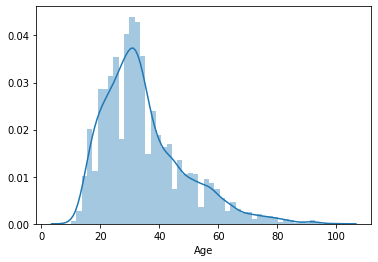

In [65]:
sns.distplot(df['Age'])

In [66]:
age_count = df['Age'].value_counts()
age_count

31.0     335
33.0     330
30.0     319
29.0     315
32.0     306
        ... 
88.0       2
87.0       1
90.0       1
99.0       1
100.0      1
Name: Age, Length: 87, dtype: int64

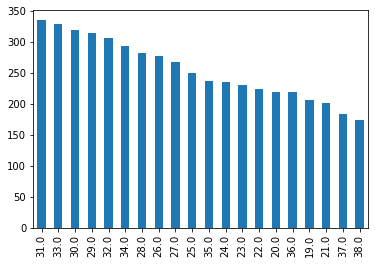

In [67]:
age_count20 = age_count.head(20)
age_count20.plot(kind="bar")

In [68]:
area_title = df.groupby(['Federation', 'Title']).size()
area_title

Federation  Title
AHO         WFM      1
            WH       1
ALB         WCM      5
            WFM      3
ALG         WCM      1
                    ..
ZAM         WFM      1
            WH       1
            WIM      1
ZIM         WCM      1
            WH       1
Length: 543, dtype: int64

In [69]:
area_title.sort_values(ascending=False,inplace=True)
area_title

Federation  Title
RUS         WH       679
            WFM      518
GER         WH       338
RUS         WCM      291
POL         WH       184
                    ... 
KAZ         FM         1
JPN         WIM        1
ZIM         WCM        1
JAM         CM         1
AHO         WFM        1
Length: 543, dtype: int64

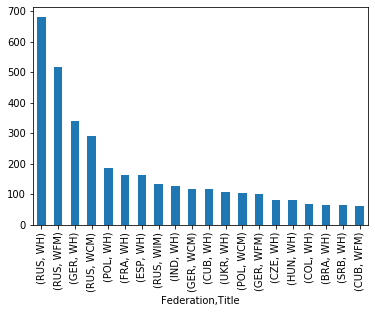

In [70]:
area_title20 = area_title.head(20)
area_title20.plot(kind="bar")

In [71]:
title_counts = df['Title'].value_counts()
title_counts.head(20)

WH     3570
WFM    1904
WCM    1689
WIM     871
WGM     319
IM      119
GM       37
FM       36
CM        8
Name: Title, dtype: int64

In [72]:
inactive = df['Inactive_flag'].value_counts()
inactive.head()

Inactive    5852
Active      2701
Name: Inactive_flag, dtype: int64

In [81]:
area_title_activity = df.loc[df['Inactive_flag'] == 'Active'].groupby(['Federation', 'Title']).size()
area_title_activity

Federation  Title
AHO         WFM      1
ALB         WCM      3
ALG         WGM      1
            WIM      5
ANG         WFM      1
                    ..
WLS         WCM      4
            WFM      2
            WH       1
ZAM         WFM      1
ZIM         WH       1
Length: 450, dtype: int64

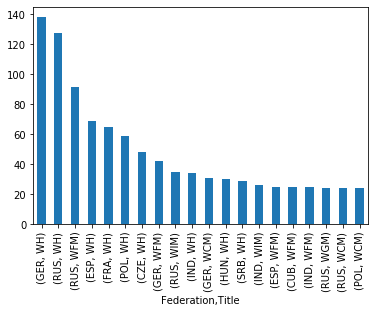

In [83]:
area_title_activity20 = area_title_activity.sort_values(ascending=False).head(20)
area_title_activity20.plot(kind="bar")